In [5]:
import numpy as np
import scipy
from bpemb import BPEmb
import matplotlib.pyplot as plt
from document_adaptation import DocumentsAdaptation, User, document_model
import json


In [6]:
embedder = BPEmb(lang="eng", dim=200, vs = 200000)
data = "data/input_phase2_a.json"

with open(data, 'r') as f:
    json_query = json.load(f)

In [9]:
user = User(json_query["userProfile"])
documents =  list(map(lambda x: document_model.DocumentModel(x, user), json_query['results']))
documents = list(filter(lambda x: bool(x.plain_text), documents))
sentences = []
for d in documents:
    for x in d.textRank():
        sentences.append(x)
keyword = user.tastes

In [21]:
sentence_embedded = [embedder.embed(s) for s in sentences]
keyword_embeddings = [embedder.embed(k) for k in keyword]

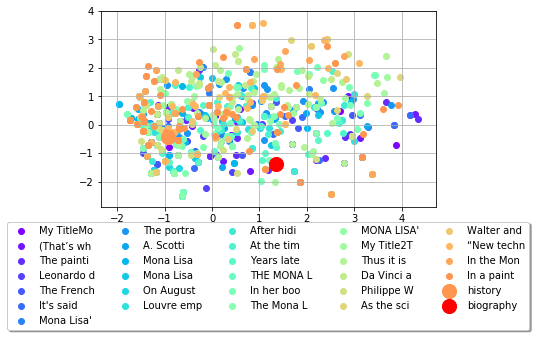

In [95]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
pca = PCA(n_components=2)
pca.fit(np.concatenate(sentence_embedded))
colors = cm.rainbow(np.linspace(0, 0.8, len(sentence_embedded)))
fig, ax = plt.subplots()
for s, c, t in zip(sentence_embedded, colors, sentences):
    mypca = pca.transform(s)
    ax.scatter(mypca[:,0], mypca[:,1],  color=c,label =t[:10])
colors = cm.rainbow(np.linspace(0.8, 10, len(keyword_embeddings)))
for k, t, c in zip(keyword_embeddings, keyword, colors):
    mypca = pca.transform(k)
    ax.scatter(mypca[:,0], mypca[:,1], s=200,  color=c, label = t)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.grid(True)
plt.show()

In [104]:
def distance_keyword(sentences, sentences_embedding, keyword_embedding):
    min = 10
    result = []
    for s, emb in zip(sentences, sentences_embedding):
        distance = np.mean(scipy.spatial.distance.cdist(emb, keyword_embedding, "cosine"))
        result.append([distance, s, emb])
    result.sort(key=lambda x: x[0])
    return result

the keyword is: history


Da Vinci also observed differences between the subject and objects in the background, and used aerial perspective to create the illusion of depth: the farther something is in the distance, the smaller the scale, the more muted the colors and the less detailed the outlines.


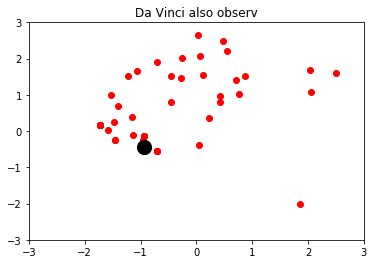

Leonardo da Vinci never completed the portrait though—when he died in 1519, it was one of many unfinished works left to his assistant.


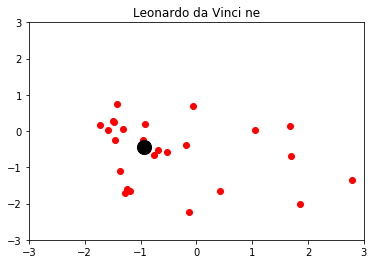

The French emperor once had Mona Lisa hanging in his bedroom in the Tuileries Palace for about four years, beginning in 1800.


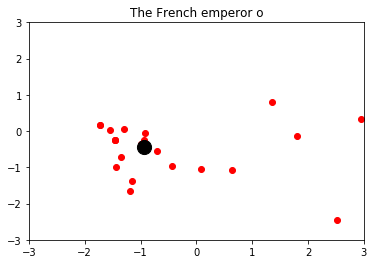

The Mona Lisahad left the Louvre a work of art; she returned as a public property, the first mass art icon.' 14.


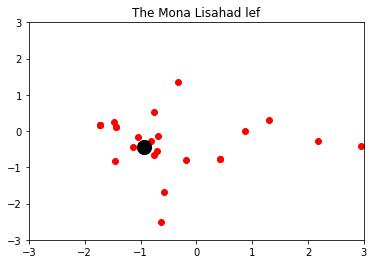

Mona Lisa received many love letters, and for a time they were so ardent that she was placed under police protection.' The painting has its own mailbox at the Louvre because of all the love letters its subject receives.


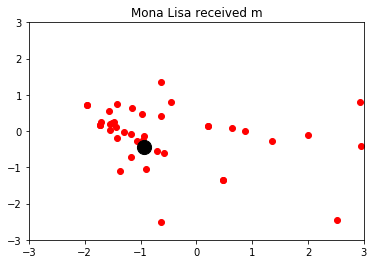

In [137]:
sorted_results = distance_keyword(sentences, sentence_embedded, keyword_embeddings[0])
print("the keyword is: " + keyword[0] + "\n\n")
for res in sorted_results[:5]:
    fig1, ax1 = plt.subplots()
    ax1.set(xlim=(-3, 3), ylim=(-3, 3))
    ax1.set_title(res[1][:20])
    print(res[1])
    mypca = pca.transform(res[2])
    ax1.scatter(mypca[:,0], mypca[:,1],  color="red")
    ax1.scatter(pca.transform(keyword_embeddings[0])[:, 0], pca.transform(keyword_embeddings[0])[:, 1], s=200, color = "black")
    plt.show()
